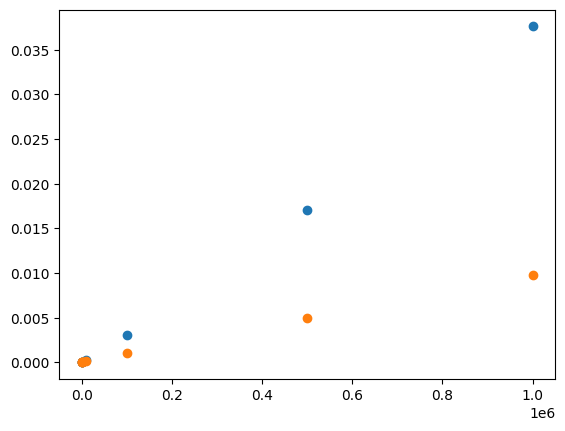

In [1]:
import scipy.fftpack
import CompPhy as cp 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from time import time

def get_time(n):
    x = np.linspace(0, 10 * np.pi, n)

    start = time()
    y = np.fft.fft(x)
    t = time() - start

    return t

def get_time_no_fft(n):
    x = np.linspace(0, 10 * np.pi, n)

    start = time()
    # y = np.fft.fft(x)
    y = x**2
    t = time() - start

    return t

N = [10, 100, 1_000, 10_000, 100_000, 500_000, 1_000_000]
t = [get_time(n) for n in N]
t2 = [get_time_no_fft(n) for n in N]

plt.scatter(N, t)

    



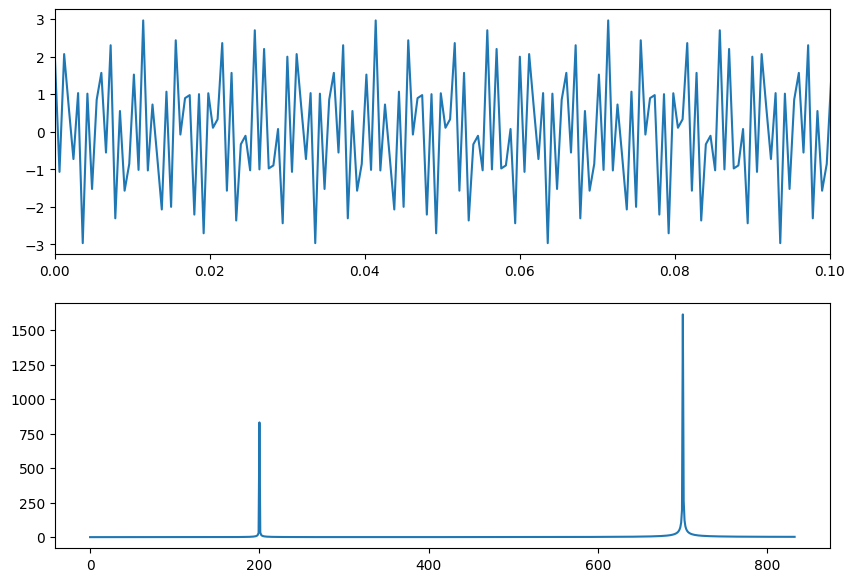

In [90]:
duration = 1
spacing = 0.0006
sample_size = int(duration / spacing)
# x = np.linspace(0, duration, sample_size)
x = np.arange(0, duration, spacing)

sin_freq = 200
cos_freq = 700
y = np.sin(2 * np.pi * sin_freq * x) + 2 * np.cos(2 * np.pi * cos_freq * x)

plt.figure(1, figsize=(10, 7))
plt.subplot(211)
plt.plot(x, y)
plt.xlim((0, 0.1))

fourier = np.abs(np.fft.fft(y)[:len(y) // 2])
frequencies = np.fft.fftfreq(sample_size, spacing)[:len(y) // 2]
plt.subplot(212)
plt.plot(frequencies, fourier)

26
26


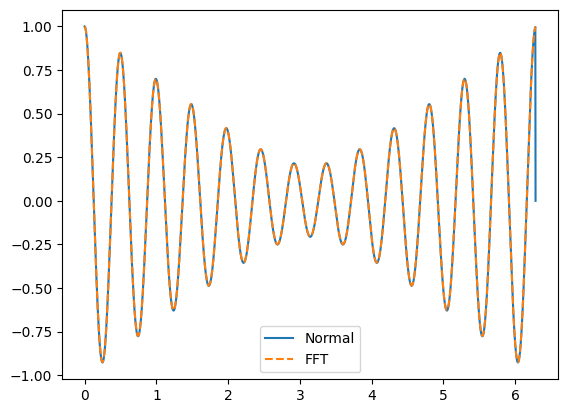

In [5]:
import scipy.fftpack
import CompPhy as cp 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from time import time



def normalized_autocorrelation(time_series: np.ndarray, mean: float | None = None, fast: bool = True) -> np.ndarray:

    if mean is None:
        mean = time_series.mean()

    series: np.ndarray = time_series - mean

    if not fast:
        C: np.ndarray = np.zeros_like(time_series)

        n = len(series)
        for t in range(n - 1):
            # C[t] = (series[: n - t] * series[t:]).mean()
            C[t] = (series * np.roll(series, shift=t, axis=0)).mean()
    else:
        C = np.fft.ifft(np.fft.fft(time_series) * np.fft.ifft(time_series)).real

    return C / C[0]

x = np.linspace(0, 2 * np.pi, 2000)
y = np.sin(2 * np.pi * 2 * x)

C = normalized_autocorrelation(y, fast=False)
plt.plot(x, C, label="Normal", alpha=1)

C = cp.normalized_autocorrelation(y, fast=True)
plt.plot(x, C, label="FFT", alpha=1, linestyle="--")
plt.legend()

print(cp.integrated_autocorrelation(y, fast=False))
print(cp.integrated_autocorrelation(y, fast=True))

# 2D Fourier

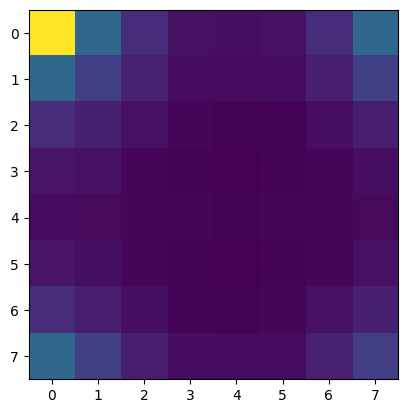

In [71]:
np.random.seed(1)
def generate_checkerboard(N: int):
    b1 = np.array([-1, 1] * (N // 2))
    b2 = np.array([1, -1] * (N // 2))
    return np.array([b1, b2] * (N // 2))

x = generate_checkerboard(8)

model = cp.Ising2D(8, 0.3, 0)
cfgs = model.generate_sample(400)


plt.imshow(C)